In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import io
import matplotlib.pylab as plt
import os
import sys
sys.path.append('/Users/rgao/Documents/Code/research/fooof/')
# Import the FOOOF object
from fooof import FOOOF

In [9]:
def ctx_viz(ctx_file, data='none', chans='none', ms=20.):
    """
    plots the cortex image, optionally scale colors by 
    a 1-D data vector
    """
    ctx_mat = sp.io.loadmat(ctx_file, squeeze_me=True)
    if data is not 'none' and chans is 'none':
        #need to fill in channel numbers
        chans = np.arange(len(data))
        
    plt.imshow(ctx_mat['I'])
    if data is 'none':
#        plt.plot(ctx_mat['X'],ctx_mat['Y'], 'ko', ms=ms)
        plt.scatter(ctx_mat['X'],ctx_mat['Y'], marker='o', c='w', s=ms) 
    else:
        #print(np.where(~np.isnan(data))[0])
        plt.scatter(ctx_mat['X'][chans],ctx_mat['Y'][chans], marker='o', s=ms, c=data, edgecolors='k', cmap='Blues') 
        cbar = plt.colorbar(fraction=0.05)
        cbar.set_ticks([min(data[~np.isnan(data)]),max(data[~np.isnan(data)])])
    
    plt.box('off')    
    plt.xlim([50, 950])
    plt.ylim([1200, 40])
    plt.yticks([])
    plt.xticks([])
    plt.tight_layout()

In [3]:
# load PSDs
PSDs = io.loadmat('/Users/rgao/Documents/Data/NeuroTycho/Propofol/20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128/PSD.mat', squeeze_me=True)

In [4]:
def fooof_NT(PSDs, freqs, freq_range=[1.,70.], fit_knee=True, band_lim=[8.,12.]):
    if fit_knee:
        n_bgparam = 3
    else:
        n_bgparam = 2        

    fm = FOOOF(fit_knee=fit_knee)
    
    numchan=128
    all_bg = np.zeros((n_bgparam,numchan))
    all_alpha = np.zeros((3,numchan))*np.nan
    all_qual = np.zeros((2,numchan))

    for chan in range(128):
        fm.fit(freqs, PSDs[chan,:], freq_range)
        bg, oscs, rsq, err = fm.get_params()
        all_qual[:,chan]=np.array([rsq,err])
        all_bg[:,chan]=np.array(bg)
        for osc in oscs:
            if osc[0]>band_lim[0] and osc[0]<band_lim[1]:
                all_alpha[:,chan] = np.array(osc)
    
    return all_bg, all_alpha, all_qual

In [5]:
freqs = np.arange(0,501)
alpha_bands = [8.,12.]

# awake eyes closed
bg_lz_ec, alpha_lz_ec, qual_lz_ec = fooof_NT(PSDs['PSD_all'][0][2,:,:], freqs, freq_range=[1,70], fit_knee=True, band_lim=alpha_bands)
bg_li_ec, alpha_li_ec, qual_li_ec = fooof_NT(PSDs['PSD_all'][0][2,:,:], freqs, freq_range=[1,70], fit_knee=False, band_lim=alpha_bands)

# anesthisized
bg_lz_an, alpha_lz_an, qual_lz_an = fooof_NT(PSDs['PSD_all'][1][2,:,:], freqs, freq_range=[1,70], fit_knee=True, band_lim=alpha_bands)
bg_li_an, alpha_li_an, qual_li_an = fooof_NT(PSDs['PSD_all'][1][2,:,:], freqs, freq_range=[1,70], fit_knee=False, band_lim=alpha_bands)


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.



FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.



FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


/Users/rgao/Documents/Code/research/fooof/fooof/funcs.py:59: RuntimeWarning: invalid value encountered in log10
  y = a - np.log10(b + x**c)



FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.



FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


[  1   8  10  13  16  22  23  24  25  26  27  28  33  34  35  37  38  39
  44  45  51  52  55  57  58  61  62  63  64  81  83  93 118 125 126]


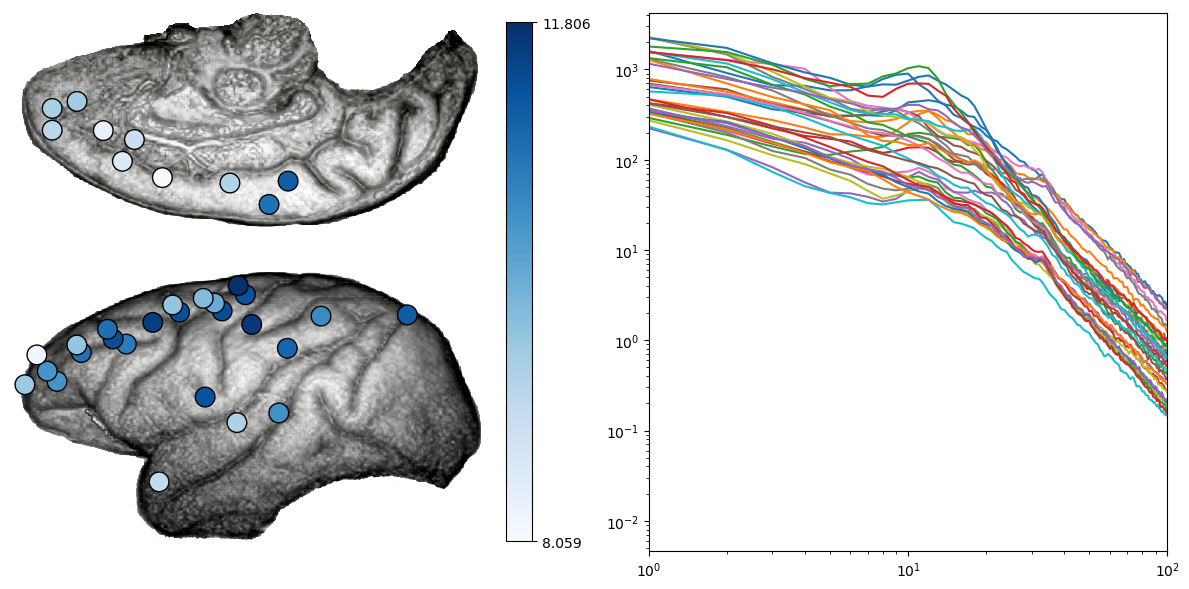

In [6]:
# plot alpha power map
ctx_file = '/Users/rgao/Documents/Data/NeuroTycho/Propofol/GridLocations/20110621KTMD_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_2Dimg/ChibiMap.mat'
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
ctx_viz(ctx_file, data=alpha_li_ec[0,:], chans = range(128), ms=200.)
plt.subplot(1,2,2)
plt.loglog(freqs, PSDs['PSD_all'][0][2,~np.isnan(alpha_li_ec[0,:]),:].T);

# plt.subplot(1,2,1)
# ctx_viz(ctx_file, data=alpha_lz_an[0,:], chans = range(128), ms=200.)
# plt.subplot(1,2,2)
# plt.loglog(freqs, PSDs['PSD_all'][1][2,~np.isnan(alpha_lz_an[0,:]),:].T);

plt.xlim([1,100])
plt.tight_layout()

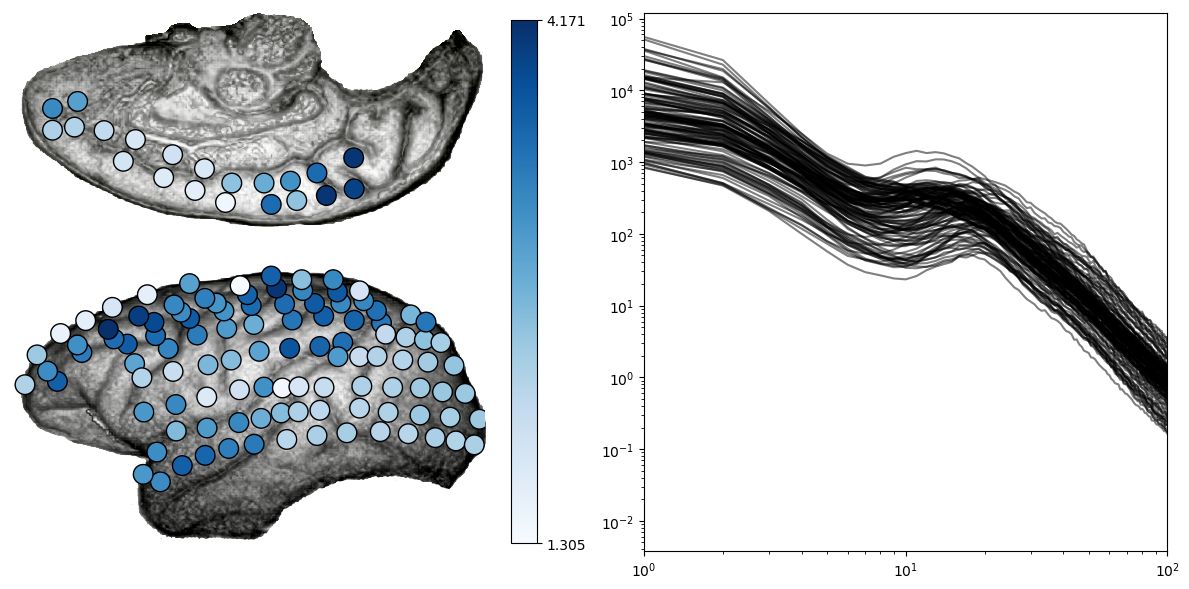

In [56]:
# plot slope map
ctx_file = '/Users/rgao/Documents/Data/NeuroTycho/Propofol/GridLocations/20110621KTMD_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_2Dimg/ChibiMap.mat'
plt.figure(figsize=(12,6))

# plot_data = bg_li_ec[-1,:]
# colors = np.zeros((128,4))
# colors[:,-1] = (plot_data-np.min(plot_data))/(np.max(plot_data)-np.min(plot_data))

plt.subplot(1,2,1)
ctx_viz(ctx_file, data=bg_lz_an[-1,:], chans = range(128), ms=200.)
plt.subplot(1,2,2)
#for chan in range(128):
#    plt.loglog(freqs, PSDs['PSD_all'][0][2,chan,:].T, color='k', alpha = (plot_data[chan]-np.min(plot_data))/(np.max(plot_data)-np.min(plot_data)));
plt.loglog(freqs, PSDs['PSD_all'][1][2,:,:].T, 'k', alpha=0.5);
#np.where(bg_lz_ec[0,:]>6)

plt.xlim([1,100])
plt.tight_layout()

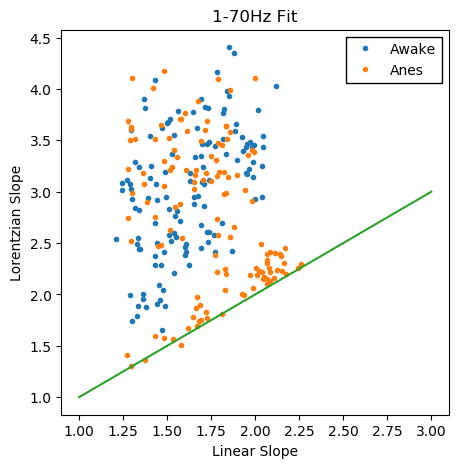

In [57]:
plt.figure(figsize=(5,5))
plt.plot(bg_li_ec[-1],bg_lz_ec[-1], '.')
plt.plot(bg_li_an[-1],bg_lz_an[-1], '.')
plt.plot([1,3], [1,3])
plt.xlabel('Linear Slope')
plt.ylabel('Lorentzian Slope')
plt.title('1-70Hz Fit')
plt.legend(('Awake','Anes'))

### comparing linear vs. Lorentzian fit error

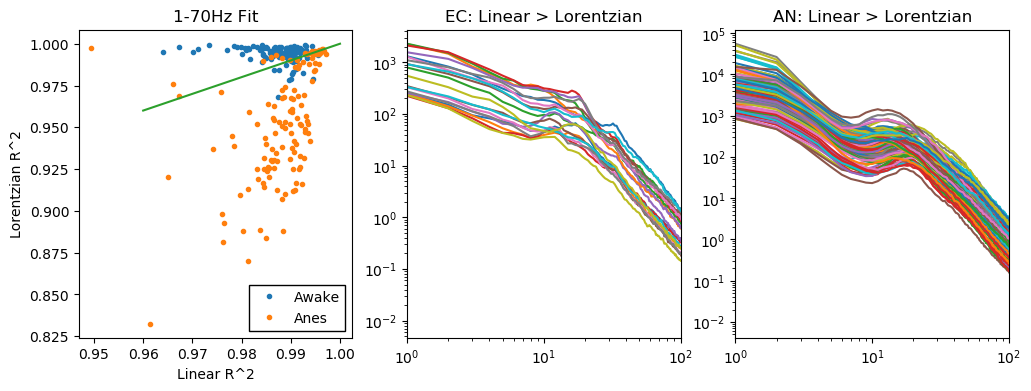

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(qual_li_ec[0],qual_lz_ec[0], '.')
plt.plot(qual_li_an[0],qual_lz_an[0], '.')
plt.plot([0.96,1], [0.96,1])
plt.xlabel('Linear R^2')
plt.ylabel('Lorentzian R^2')
plt.title('1-70Hz Fit')
plt.legend(('Awake','Anes'))
plt.subplot(1,3,2)
plt.loglog(freqs, PSDs['PSD_all'][0][2,qual_li_ec[0]>qual_lz_ec[0],:].T);
plt.xlim([0,100])
plt.title('EC: Linear > Lorentzian')
plt.subplot(1,3,3)
plt.loglog(freqs, PSDs['PSD_all'][1][2,qual_li_an[0]>qual_lz_an[0],:].T);
plt.xlim([0,100])
plt.title('AN: Linear > Lorentzian')

Linear performs much better than Lorentzian, unsurprisingly, in situations where it's a lot more linear, though in theory Lorentzian should still converge to the linear fit.

/Users/rgao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


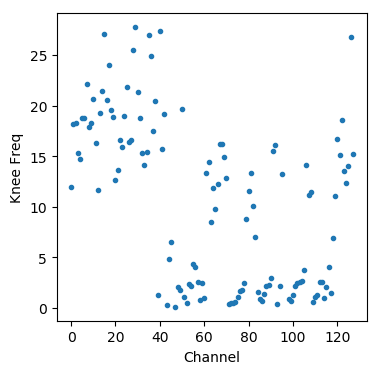

In [63]:
plt.plot(bg_lz_an[1]**(1/bg_lz_an[2]), '.')
#plt.loglog(freqs, PSDs['PSD_all'][0][2,bg_lz_ec[1]>25000.,:].T);
plt.xlabel('Channel')
plt.ylabel('Knee Freq')

/Users/rgao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


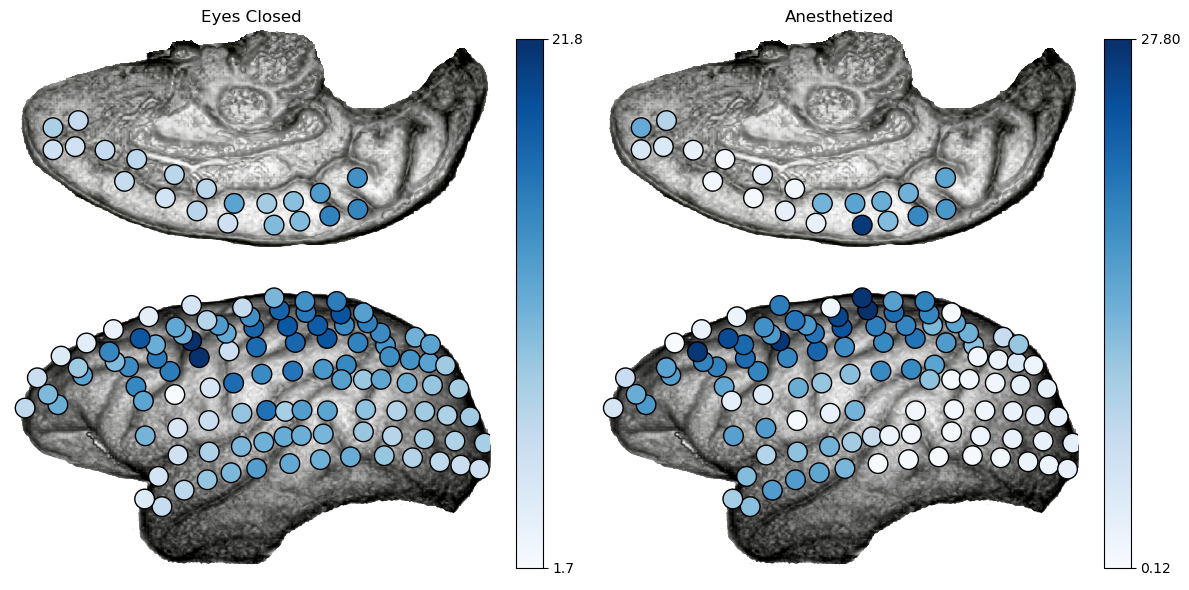

In [66]:
# plot knee map
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ctx_viz(ctx_file, data=bg_lz_ec[1]**(1/bg_lz_ec[2]), chans = range(128), ms=200.)
plt.title('Eyes Closed')

plt.subplot(1,2,2)
ctx_viz(ctx_file, data=bg_lz_an[1]**(1/bg_lz_an[2]), chans = range(128), ms=200.)
plt.title('Anesthetized')
plt.tight_layout()

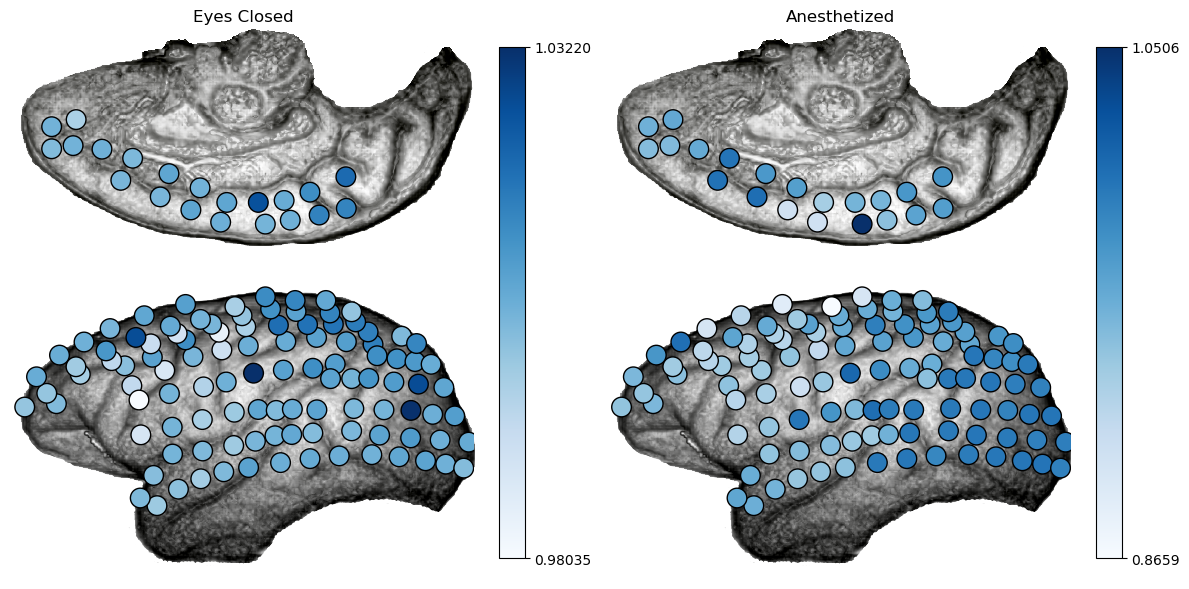

In [71]:
# plot fit quality
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ctx_viz(ctx_file, data=(qual_lz_ec[0]/qual_li_ec[0]), chans = range(128), ms=200.)
plt.title('Eyes Closed')

plt.subplot(1,2,2)
ctx_viz(ctx_file, data=(qual_lz_an[0]/qual_li_an[0]), chans = range(128), ms=200.)
plt.title('Anesthetized')
plt.tight_layout()


FOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. 
   This may lead to overfitting of small bandwidth oscillations.


                                          FOOOF - PSD MODEL                                          

                      The input PSD was modeled in the frequency range 1-70 Hz                      
                                 Frequency Resolution is 1.00 Hz 
                                  
                           Background Parameters (offset, knee, slope):                             
                                     5.9283, 1271.5505, 2.8798                                      

                                      1 oscillations were found:                                     
                                 CF:  16.55, Amp:  0.220, BW:  7.13                                 

                                      R^2 of model fit is 0.9761                                     

                           Root mean squa

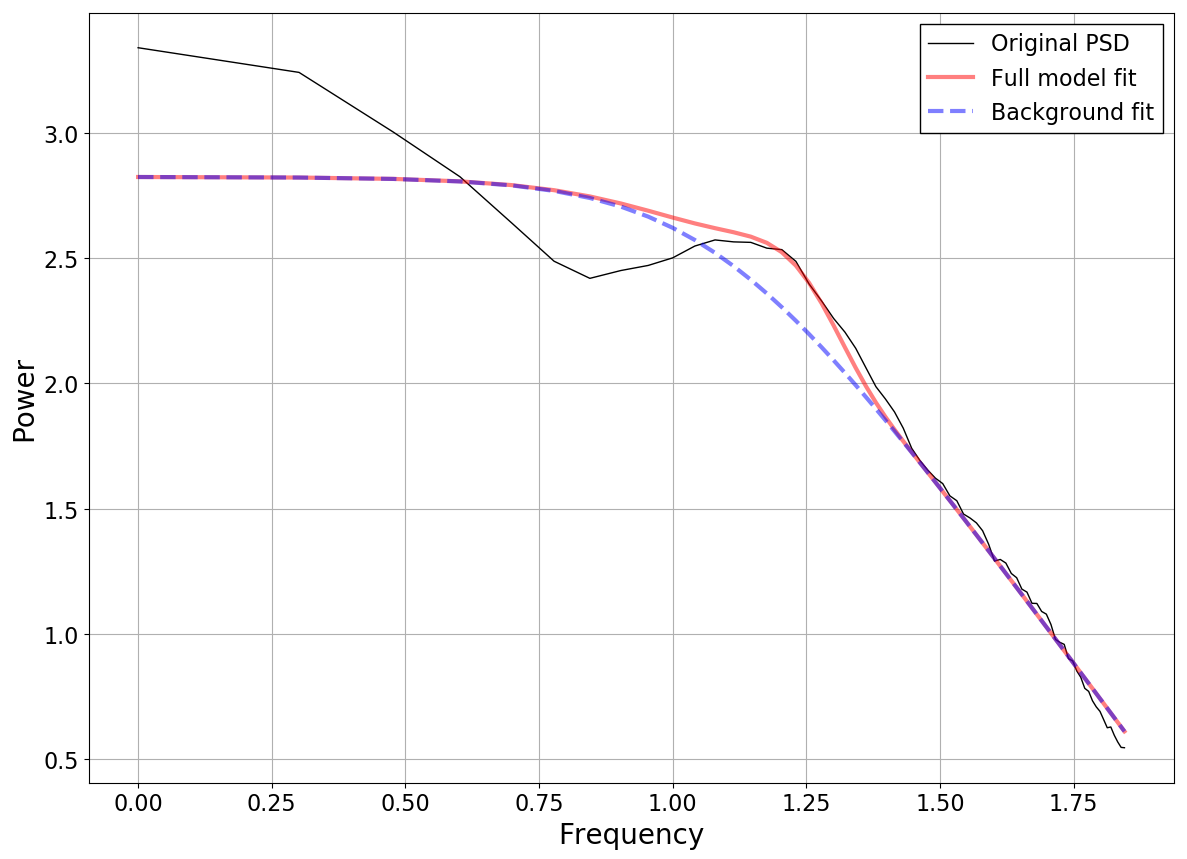

In [78]:
fm = FOOOF(fit_knee=True)
freq_range = [1,70]
freqs = np.arange(0,501)
fm.model(freqs, PSDs['PSD_all'][1][2,0,:], freq_range, plt_log=True)

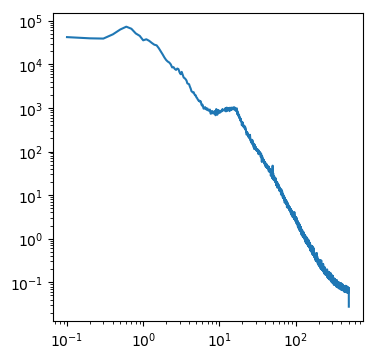

In [79]:
# just making sure the PSDs were computed correctly
ecog = io.loadmat('/Users/rgao/Documents/Data/NeuroTycho/Propofol/20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128/Session2/ECoG_ch1.mat', squeeze_me=True)
from scipy import signal
pp = signal.welch(ecog['ECoGData_ch1'], fs=1000., nperseg=10000, noverlap=500)
plt.loglog(pp[0],pp[1])


                                          FOOOF - PSD MODEL                                          

                    The input PSD was modeled in the frequency range 0.1-100 Hz                     
                                 Frequency Resolution is 0.10 Hz 
                                  
                              Background Parameters (offset, slope):                                
                                           4.5564, 1.9920                                           

                                      6 oscillations were found:                                     
                                 CF:  16.31, Amp:  0.783, BW:  9.67                                 
                                 CF:  29.27, Amp:  0.477, BW: 12.00                                 
                                 CF:  43.76, Amp:  0.328, BW: 12.00                                 
                                 CF:  50.07, Amp:  0.336, BW:  0.50                   

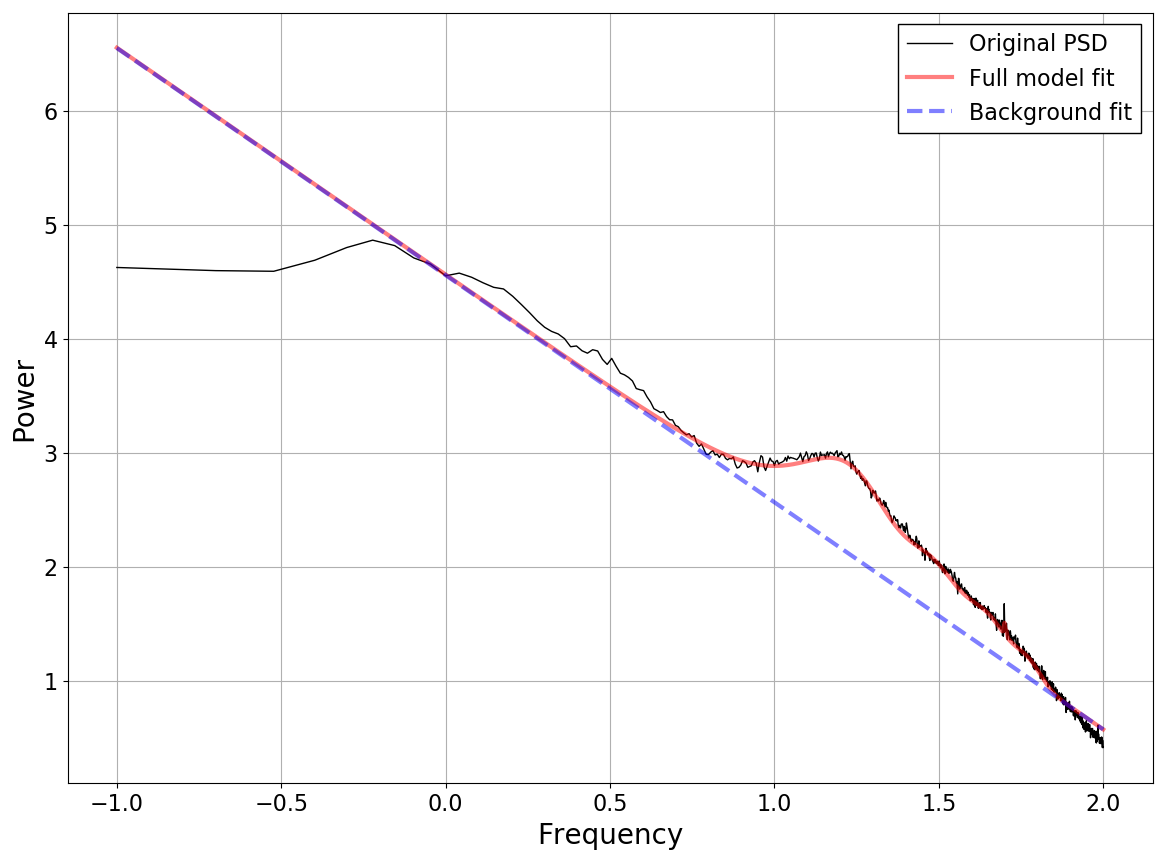

In [85]:
fm = FOOOF(fit_knee=False)
freq_range = [0.1,100]
freqs = np.arange(0,501)
fm.model(pp[0], pp[1], freq_range, plt_log=True)